- 본 과제는 KNN, 인공신경만 순으로 진행됩니다.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

- 유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도
(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을
구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.

- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)

# KNN

### 스텝1 - 자료와 패키지 불러오기, 데이터 구성하기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
# path = '/home/piai/Downloads/big_data/' # for Ubuntu
path = 'C:/Users/moon/Downloads/3. Big Data 분석/'# for Windows

df_raw = pd.read_csv(path + '유방암.csv')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [5]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
# 데이터에 대해서 학습, 검증, 테스트 데이터로 분할한다.
X = df_raw.drop('diagnosis', axis = 1)
Y = df_raw['diagnosis']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 1234)
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size = 0.4, random_state = 1234)

In [7]:
# 분리된 데이터셋의 (행, 열)을 살펴보면 다음과 같다.
print(trainX.shape)
print(trainY.shape)
print(validX.shape)
print(validY.shape)
print(testX.shape)
print(testY.shape)

(238, 30)
(238,)
(160, 30)
(160,)
(171, 30)
(171,)


### 스텝2 - 모델 생성

In [8]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(trainX, trainY)

print('트레이닝셋 정확도:{:.3f}'.format(knn_uncustomized.score(trainX,trainY)))
print('검증셋 정확도:{:.3f}'.format(knn_uncustomized.score(validX,validY)))

트레이닝셋 정확도:0.954
검증셋 정확도:0.919


In [9]:
# 테스트셋과 트레이닝셋 정확도는 좋은 성능을 보인다.
# 파라미터 튜닝을 통해 이를 더 개선시킬 수 있는지에 대해서 살펴보자.

In [10]:
# k수 증가에 따른 정확도 변화를 살펴본다.
train_accuracy_neighbors, valid_accuracy_neighbors = [], []
para_n_neighbors = [i for i in range(3,31)]

for para_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = para_neighbors)
    knn.fit(trainX,trainY)
    train_accuracy_neighbors.append(knn.score(trainX,trainY))
    valid_accuracy_neighbors.append(knn.score(validX,validY))

In [11]:
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['n_neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy_neighbors
df_accuracy_neighbors['ValidAccuracy'] = valid_accuracy_neighbors

In [12]:
df_accuracy_neighbors.round(3)

,n_neighbors,TrainAccuracy,ValidAccuracy
0,3,0.962,0.919
1,4,0.950,0.919
2,5,0.954,0.919
3,6,0.945,0.919
4,7,0.958,0.919
5,8,0.954,0.919
6,9,0.954,0.919
7,10,0.941,0.925
8,11,0.945,0.919
9,12,0.924,0.919


### K의 수가 3~30까지 변화할 때의 정확도 그래프는 다음과 같다.

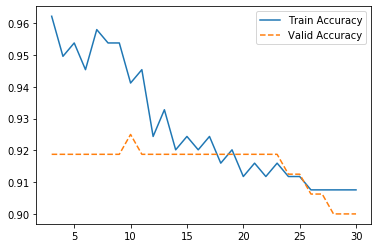

In [14]:
plt.plot(para_n_neighbors, train_accuracy_neighbors, linestyle='-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, valid_accuracy_neighbors, linestyle='--', label = 'Valid Accuracy')
plt.legend()

In [15]:
# k의 수가 늘어날수록 오히려 과소적합이 일어나고 있다.
# 훈련 데이터셋과 테스트 데이터셋의 정확도가 모두 높은 10을 선택하도록 한다.

# 하지만, 위의 모델은 다른 하이퍼파라미터가 디폴트인 상태에서 k의 수만 변경시켜 확인한 결과이다.
# 다른 파라미터들과 연관지어 최적의 K를 찾아보도록 하자.

In [21]:
#### 가중치별 이웃 수 증가에 따른 정확도 변화
train_accuracy_weight, valid_accuracy_weight = [], []
para_n_neighbors = [i for i in range(1,11)]*2

para_weights = (['uniform']) * 10 + (['distance'] *10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights=v_weights)
    knn.fit(trainX,trainY)
    train_accuracy_weight.append(knn.score(trainX,trainY))
    valid_accuracy_weight.append(knn.score(validX,validY))
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy_weight
df_accuracy_weights['ValidAccuracy'] = valid_accuracy_weight
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidAccuracy
0,1,uniform,1.000,0.900
1,2,uniform,0.975,0.906
2,3,uniform,0.962,0.919
3,4,uniform,0.950,0.919
4,5,uniform,0.954,0.919
5,6,uniform,0.945,0.919
6,7,uniform,0.958,0.919
7,8,uniform,0.954,0.919
8,9,uniform,0.954,0.919
9,10,uniform,0.941,0.925


In [22]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',columns='Weights',values = ['TrainAccuracy','ValidAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           ValidAccuracy         
Weights        distance   uniform      distance  uniform
Neighbors                                               
1                   1.0  1.000000       0.90000  0.90000
2                   1.0  0.974790       0.90000  0.90625
3                   1.0  0.962185       0.91875  0.91875
4                   1.0  0.949580       0.91875  0.91875
5                   1.0  0.953782       0.91250  0.91875
6                   1.0  0.945378       0.91250  0.91875
7                   1.0  0.957983       0.91250  0.91875
8                   1.0  0.953782       0.91875  0.91875
9                   1.0  0.953782       0.91875  0.91875
10                  1.0  0.941176       0.91875  0.92500

In [23]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidAccuracy_distance,ValidAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.90000,0.90000
2,1.0,0.974790,0.90000,0.90625
3,1.0,0.962185,0.91875,0.91875
4,1.0,0.949580,0.91875,0.91875
5,1.0,0.953782,0.91250,0.91875


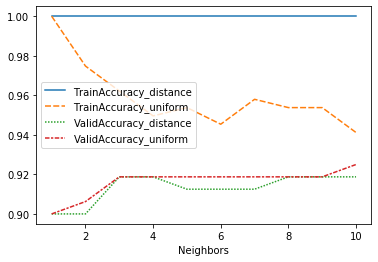

In [24]:
sns.lineplot(data = df_accuracy_weights_pivot)

In [25]:
# 가중치가 distatnce일 때 학습 데이터의 모델 정확도는 k의 수와 관계없이 항상 1이다.
# 가중치가 distance일 때 과대적합이 발생하므로 uniform으로 설정한다.
# 가중치가 distance인 경우 k = 10일 훈련, 검증데이터의 성능이 우수하므로 이 값을 사용하도록 한다.

In [26]:
# 위의 하이퍼파라미터를 선택했을 때, 거리 측정 방법 차이에 따른 정확도의 변화를 살펴본다.

train_accuracy_metric = []; valid_accuracy_metric = []
metric_list = []
para_n_neighbors = [i for i in range(1,11)]

para_metric = ['minkowski', 'euclidean','manhattan']

for metric in para_metric:
    knn = KNeighborsClassifier(n_neighbors = 10, metric = metric , weights='uniform')
    knn.fit(trainX,trainY)
    metric_list.append(metric)
    train_accuracy_metric.append(knn.score(trainX,trainY))
    valid_accuracy_metric.append(knn.score(validX,validY))
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy_metric
df_accuracy_metric['ValidAccuracy'] = valid_accuracy_metric
df_accuracy_metric.round(3)

,Metric,TrainAccuracy,ValidAccuracy
0,minkowski,0.941,0.925
1,euclidean,0.941,0.925
2,manhattan,0.941,0.925


In [21]:
# 거리 계산방법별로 약간의 차이가 존재하지 않는다.
# 세 가지 방법 모두, 훈련 데이터셋과 검증 데이터셋의 정확도는 같다.
# 따라서, 가장 기본이 되는 측정방식인 유클리디안 방식을 채택하기로 한다.

## 스텝3 - 결론 도출

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', metric = 'euclidean')
knn_model.fit(trainX, trainY)

y_pred = knn_model.predict(testX)
con_mat = confusion_matrix(testY, y_pred)
print('훈련 데이터셋 정확도: {0:.3f}'.format(knn_model.score(trainX, trainY)))
print('검증 데이터셋 정확도: {0:.3f}'.format(knn_model.score(testX, testY)))
print('혼동 행렬: \n{}'.format(con_mat))

훈련 데이터셋 정확도: 0.941
검증 데이터셋 정확도: 0.924
혼동 행렬: 
[[102   3]
 [ 10  56]]


#### 해당 모델로 예측한 testX의 예측값은 다음과 같다.

In [28]:
knn_model.predict(testX)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [29]:
a, b, c, d = con_mat[0][0], con_mat[0][1], con_mat[1][0], con_mat[1][1]

accuracy = (a+d)/(a+b+c+d)
precision = (a)/(a+c)
recall = (a)/(a+b)

print('예측 정확도(accuracy): {:.3f}'.format(accuracy))
print('정밀도(precision): {:.3f}'.format(precision))
print('재현율(recall): {:.3f}'.format(recall))

예측 정확도(accuracy): 0.924
정밀도(precision): 0.911
재현율(recall): 0.971


- 해당 모델은 유방암 진단시 양성 여부를 판단하는 모델이다.
- 정확도는 92.4%, 정밀도 91.1%, 재현율은 97.1%의 성능을 보이고 있다.

- 이와 같이 양성 진료 목적의 모델은 참(양성)이라고 예측한 것 중 실제 참(양성)인 것을 측정한 지표인 정밀도가 중요하다.
- 이 수치가 낮다는 것은 양성이라고 예측했지만 실제로는 악성이었다는 의미로, 잘못된 판단으로 인해 피검진자의 건강에 지장을 초래할 확률이 높다는 것을 의미한다.

- 1000건을 검진(예측)했을 때, 89건의 오분류을 가지는 해당 모델을 진료에 도입하기에는 다소 부적절하며 추가적인 데이터를 추출해 모델을 정교화할 필요가 있다.

# 인공신경망

## 스텝1 - 패키지와 필요 라이브러리 불러오기
- 데이터셋은 1번 문제에서 불러왔으므로 생략한다.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

## 스텝2 - 기본 옵션으로 MLP모델 생성해보기

In [31]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(trainX, trainY)

print('훈련세트 정확도: {:.3f}'.format(nn_uncustomized.score(trainX,trainY)))
print('검증세트 정확도: {:.3f}'.format(nn_uncustomized.score(validX,validY)))

훈련세트 정확도: 0.941
검증세트 정확도: 0.931


In [32]:
# 디폴트이지만, 모델의 정확도는 우수하다. 파라미터 튜닝을 통해서 추가적으로 개선을 할 수 있는지 알아보도록 하자.

In [33]:
# 은닉층 변경
train_accuracy = []; valid_accuracy = []
para_hidden = [2*hidden for hidden in np.arange(1,40,1)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(trainX, trainY)
    train_accuracy.append(nn.score(trainX, trainY))
    valid_accuracy.append(nn.score(validX, validY))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = valid_accuracy

In [34]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,2,0.622,0.650
1,4,0.681,0.731
2,6,0.929,0.919
3,8,0.887,0.888
4,10,0.941,0.944
5,12,0.920,0.925
6,14,0.912,0.912
7,16,0.912,0.912
8,18,0.895,0.919
9,20,0.853,0.869


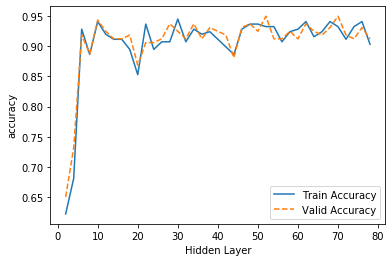

In [35]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_hidden, valid_accuracy, linestyle='--', label = 'Valid Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [36]:
# hidden 레이어의 수를 10개로 선택하도록 한다.(은닉층 1개)

In [37]:
# 활성화 함수 변경
train_accuracy_function = []; valid_accuracy_function = []

para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(trainX, trainY)
    train_accuracy_function.append(nn.score(trainX, trainY))
    valid_accuracy_function.append(nn.score(validX, validY))

df_accuracy_function = pd.DataFrame()
df_accuracy_function['HiddenLayer'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy_function
df_accuracy_function['ValidAccuracy'] = valid_accuracy_function

In [38]:
df_accuracy_function.round(3)

,HiddenLayer,TrainAccuracy,ValidAccuracy
0,logistic,0.903,0.912
1,tanh,0.903,0.912
2,relu,0.903,0.912


[Text(0, 0, 'logistic'), Text(0, 0, 'tanh'), Text(0, 0, 'relu')]

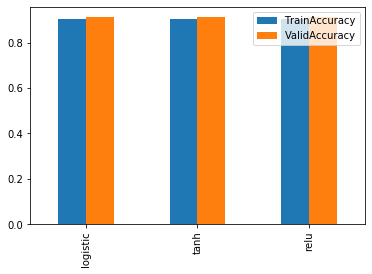

In [39]:
ax = df_accuracy_function.plot(kind='bar')
ax.set_xticklabels(df_accuracy_function.HiddenLayer.values)

In [40]:
# 위 그래프와 데이터프레임을 통해서 세가지 활성화함수가 모두 같은 정확도를 가진다는 것을 확인했다. 
# 따라서, 이어지는 분석에서는 Relu함수를 사용하도록 한다.
# 렐루함수는 양수인 값에 대해서 기울기가 항상 일정하므로 역전파시 기울기가 크게 소실되지 않고 잘 전달된다는 장점이 있다.

In [41]:
v_feature_name = trainX.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
sc_testX = scaler.fit_transform(testX)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [42]:
sc_trainX, sc_validX ,sc_trainY, sc_validY= train_test_split(df_scaled, Y, test_size = 0.3, random_state =1234)
print('train data X size: {}'.format(sc_trainX.shape))
print('train data Y size: {}'.format(sc_trainY.shape))
print('valid data X size: {}'.format(sc_validX.shape))
print('valid data Y size: {}'.format(sc_validY.shape))

train data X size: (398, 30)
train data Y size: (398,)
valid data X size: (171, 30)
valid data Y size: (171,)


#### 스케일 조정된 데이터를 사용해서 새로운 모델을 생성해보도록 한다.

In [43]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(sc_trainX, sc_trainY)

print('학습 데이터셋 정확도: {:.3f}'.format(nn_scaled.score(sc_trainX,sc_trainY)))
print('테스트 데이터셋 정확도: {:.3f}'.format(nn_scaled.score(sc_validX,sc_validY)))

학습 데이터셋 정확도: 0.995
테스트 데이터셋 정확도: 0.953


In [44]:
# 스케일된 새 모델 파라미터 튜닝 - 은닉층 변경

train_accuracy_hidden = []; valid_accuracy_hidden = []

para_hidden = [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)
    nn.fit(sc_trainX, sc_trainY)
    train_accuracy_hidden.append(nn.score(sc_trainX, sc_trainY))
    valid_accuracy_hidden.append(nn.score(sc_validX, sc_validY))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy_hidden
df_accuracy_hidden['ValidAccuracy'] = valid_accuracy_hidden

In [45]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,ValidAccuracy
0,20,0.997,0.947
1,40,0.997,0.942
2,60,1.000,0.965
3,80,1.000,0.953
4,100,1.000,0.947
5,120,1.000,0.953
6,140,1.000,0.947
7,160,1.000,0.959
8,180,1.000,0.947
9,200,1.000,0.953


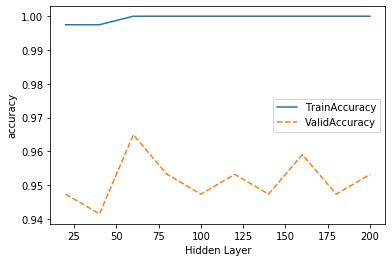

In [46]:
plt.plot(para_hidden, train_accuracy_hidden, linestyle='-', label = 'TrainAccuracy')
plt.plot(para_hidden, valid_accuracy_hidden, linestyle='--', label = 'ValidAccuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [47]:
# 위 그래프와 데이터프레임을 통해 은닉층 파라미터를 60으로 지정한다.

In [48]:
# 다음으로 활성화 함수를 변경하도록 한다.

train_accuracy_function = []; valid_accuracy_function = []

para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (60,60)  ,random_state = 1234)
    nn.fit(sc_trainX, sc_trainY)
    train_accuracy_function.append(nn.score(sc_trainX, sc_trainY))
    valid_accuracy_function.append(nn.score(sc_validX, sc_validY))

df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy_function
df_accuracy_function['ValidAccuracy'] = valid_accuracy_function

In [49]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,ValidAccuracy
0,logistic,0.995,0.936
1,tanh,0.997,0.971
2,relu,1.000,0.965


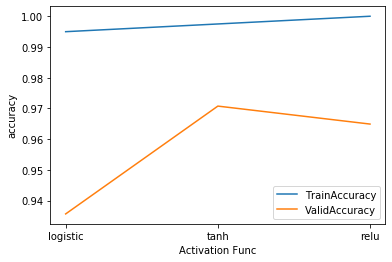

In [50]:
plt.plot(para_function, train_accuracy_function, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_function, valid_accuracy_function, linestyle = '-', label = 'ValidAccuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Func')
plt.legend()

In [51]:
# 두 데이터셋의 정확도가 모두 좋은 퍼포먼스를 보이는 하이퍼볼릭 탄젠트함수를 사용하도록 한다.

In [52]:
# 다음으로 가중치 최적화 환경을 변경하도록 한다.
train_accuracy_solver = []; valid_accuracy_solver = []

para_solver = ['lbfgs','sgd','adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = 'tanh', hidden_layer_sizes = (60,60)  ,random_state = 1234)
    nn.fit(sc_trainX, sc_trainY)
    train_accuracy_solver.append(nn.score(sc_trainX, sc_trainY))
    valid_accuracy_solver.append(nn.score(sc_validX, sc_validY))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy_solver
df_accuracy_solver['ValidAccuracy'] = valid_accuracy_solver

In [53]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,ValidAccuracy
0,lbfgs,1.000,0.971
1,sgd,0.985,0.959
2,adam,0.997,0.971


In [54]:
# 위 도표를 통해 정확도가 가장 높은 Solver인 lbfgs를 사용하도록 한다.

In [55]:
# 다음으로 가중치 최적화 환경을 변경하도록 한다.
train_accuracy_batch = []; valid_accuracy_batch = []

para_batch = [5* batch for batch in range(1,20)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'lbfgs', activation = 'tanh', hidden_layer_sizes = (60,60)  ,random_state = 1234)
    nn.fit(sc_trainX, sc_trainY)
    train_accuracy_batch.append(nn.score(sc_trainX, sc_trainY))
    valid_accuracy_batch.append(nn.score(sc_validX, sc_validY))

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy_batch
df_accuracy_batch['ValidAccuracy'] = valid_accuracy_batch

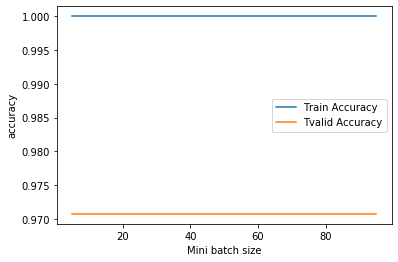

In [56]:
df_accuracy_batch.round(3)

plt.plot(para_batch, train_accuracy_batch, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_batch, valid_accuracy_batch, linestyle = '-', label = 'Tvalid Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Mini batch size')
plt.legend()

In [57]:
# batch size에 관계없이 일정한 정확도를 보이므로 사이즈 20으로 고정하도록 한다.

## 스텝3 - 결론 도출

In [58]:
nn_model = MLPClassifier(hidden_layer_sizes = (60,60), activation = 'tanh', solver = 'lbfgs',
               random_state = 1234, batch_size = 20)
nn_model.fit(sc_trainX, sc_trainY)

y_pred = nn_model.predict(sc_testX)
con_mat2 = confusion_matrix(testY, y_pred)
print('훈련 데이터셋 정확도: {0:.3f}'.format(nn_model.score(sc_trainX, sc_trainY)))
print('검증 데이터셋 정확도: {0:.3f}'.format(nn_model.score(sc_testX, testY)))
print('혼동 행렬: \n{}'.format(con_mat))

훈련 데이터셋 정확도: 1.000
검증 데이터셋 정확도: 0.965
혼동 행렬: 
[[102   3]
 [ 10  56]]


In [59]:
a, b, c, d = con_mat2[0][0], con_mat2[0][1], con_mat2[1][0], con_mat2[1][1]

accuracy2 = (a+d)/(a+b+c+d)
precision2 = (a)/(a+c)
recall2 = (a)/(a+b)

print('예측 정확도(accuracy): {:.3f}'.format(accuracy2))
print('정밀도(precision): {:.3f}'.format(precision2))
print('재현율(recall): {:.3f}'.format(recall2))

예측 정확도(accuracy): 0.965
정밀도(precision): 0.971
재현율(recall): 0.971


- 위 모델은 유방암 진단시 양성 여부를 판단하는 인공신경망 모델이다.
- 정확도는 96.5%, 정밀도 97.1%, 재현율은 97.1%의 성능을 보이고 있다.

- 이와 같이 양성 진료 목적의 모델은 참(양성)이라고 예측한 것 중 실제 참(양성)인 것을 측정한 지표인 정밀도가 중요하다.

- 이 수치가 낮다는 것은 양성이라고 예측했지만 실제로는 악성이었다는 의미로, 잘못된 판단으로 인해 피검진자의 건강에 지장을 초래할 확률이 높다는 것을 의미한다.
  
- 이와같은 점에서 위 모델은 준수한 성능을 가진다.